In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
from google.colab import files
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

data = files.upload()

Saving rantweet.csv to rantweet.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(data['rantweet.csv'].decode('latin-1')))
df.head()

,User,Tweet
0,scotthamilton,is upset that he can't update his Facebook by ...
1,mattycus,@Kenichan I dived many times for the ball. Man...
2,ElleCTF,my whole body feels itchy and like its on fire
3,Karoli,"@nationwideclass no, it's not behaving at all...."
4,joy_wolf,@Kwesidei not the whole crew


In [ ]:
def cleanTxt(text):
  text = re.sub(r"@[A-Za-z0-9]+", "", text) #removed @mentions
  text = re.sub(r'#', '', text) #remove "#"
  text = re.sub(r'RT[\s]+', '', text) # remove retweets
  text = re.sub(r'https?:\/\/\S+', '',text) #remove hyper link
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text) #removed emojis
 
  return text
#cleaning the text
df['CleanedText'] = df['Tweet'].apply(cleanTxt)
#df['Tweets'] = df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,User,Tweet,CleanedText
0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,joy_wolf,@Kwesidei not the whole crew,not the whole crew
...,...,...,...
195,tantrixie,wanttss to go out,wanttss to go out
196,supersharayah,Is not going to sleep tonite.,Is not going to sleep tonite.
197,bluepaintred,too worried and tired to post tonight,too worried and tired to post tonight
198,AmyJade,couldn't get shit done today ~ i'm so screwed,couldn't get shit done today ~ i'm so screwed


In [ ]:
# create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show new dataframe with new columns
df

,User,Tweet,CleanedText,Subjectivity,Polarity
0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.0,0.000
1,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.5,0.500
2,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.4,0.200
3,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",1.0,-0.625
4,joy_wolf,@Kwesidei not the whole crew,not the whole crew,0.4,0.200
...,...,...,...,...,...
195,tantrixie,wanttss to go out,wanttss to go out,0.0,0.000
196,supersharayah,Is not going to sleep tonite.,Is not going to sleep tonite.,0.0,0.000
197,bluepaintred,too worried and tired to post tonight,too worried and tired to post tonight,0.7,-0.400
198,AmyJade,couldn't get shit done today ~ i'm so screwed,couldn't get shit done today ~ i'm so screwed,0.8,-0.200


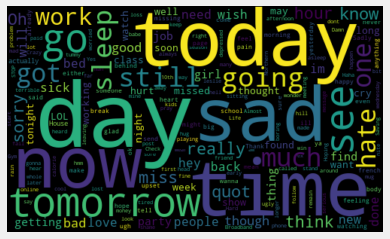

In [ ]:
from numpy.lib.function_base import interp
from pandas.core.common import random_state
#Plot the word Cloud
allWords = ' '.join( [twts for twts in df['CleanedText']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119 ).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

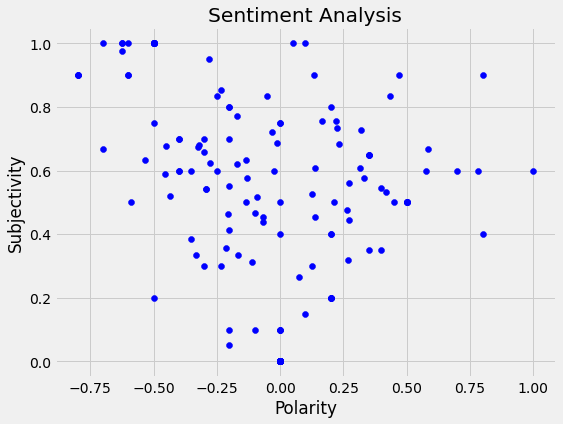

In [ ]:
#polot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#create a function to compute the analysis, negative,neural or positive
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the dataframe
df

,User,Tweet,CleanedText,Subjectivity,Polarity,Analysis
0,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,0.0,0.000,Neutral
1,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,0.5,0.500,Positive
2,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0.4,0.200,Positive
3,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",1.0,-0.625,Negative
4,joy_wolf,@Kwesidei not the whole crew,not the whole crew,0.4,0.200,Positive
...,...,...,...,...,...,...
195,tantrixie,wanttss to go out,wanttss to go out,0.0,0.000,Neutral
196,supersharayah,Is not going to sleep tonite.,Is not going to sleep tonite.,0.0,0.000,Neutral
197,bluepaintred,too worried and tired to post tonight,too worried and tired to post tonight,0.7,-0.400,Negative
198,AmyJade,couldn't get shit done today ~ i'm so screwed,couldn't get shit done today ~ i'm so screwed,0.8,-0.200,Negative


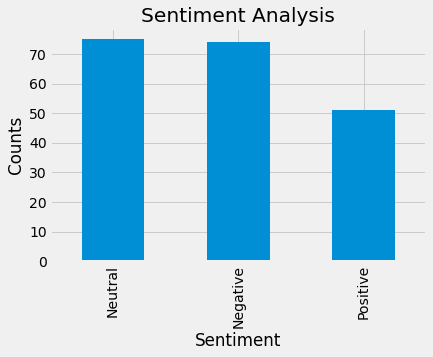

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#get the precentage of negative tweets
ptweets = df[df.Analysis == 'Positive']
ptweets  = ptweets['Tweet']

round((ptweets.shape[0]/df.shape[0])* 100,1)

25.5

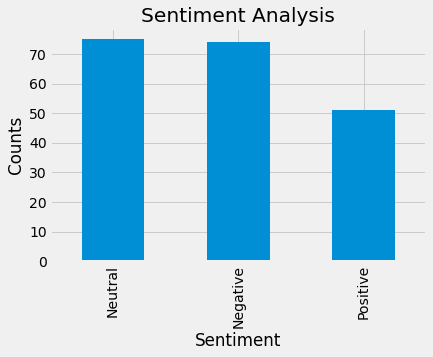

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
pip install opencv-python